In [68]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [69]:

data=pd.read_csv(r"D:\IOAI\Practice\archive\breast_cancer_bd.csv",sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [70]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [71]:
for col in data.columns:
    print(f"{col}:{data[col].unique()}")

Sample code number:[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  117

In [72]:
cancerdf=data[data["Bare Nuclei"]!="?"]
cancerdf=cancerdf.astype({"Bare Nuclei":int})
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [73]:
print(f"no of duplicated rows:{cancerdf.duplicated().sum()}")

no of duplicated rows:8


In [74]:
cancerdf=cancerdf.drop_duplicates()
print(f"no of duplicated rows:{cancerdf.duplicated().sum()}")

no of duplicated rows:0


In [75]:
cancerdf.shape

(675, 11)

In [76]:
cancerdf.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.078448e+06,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,2.699259
std,6.229108e+05,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.954413
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.781505e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171845e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238777e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Text(0.5, 1.0, 'histogram of class')

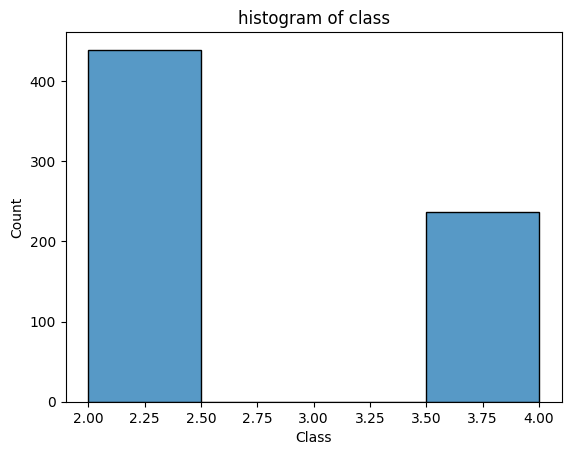

In [77]:
sns.histplot(cancerdf['Class'],bins=4)
plt.title('histogram of class')

In [78]:
cancerdf['Class'].value_counts(normalize=True)*100

Class
2    65.037037
4    34.962963
Name: proportion, dtype: float64

In [79]:
cancerdf['Class']=cancerdf['Class'].astype(int)
cancerdf['Class']=cancerdf['Class'].map({2:'Benign',4:'Malignant'})
cancerdf.sample(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
223,1226612,7,5,6,3,3,8,7,4,1,Malignant
18,1050670,10,7,7,6,4,10,4,1,2,Malignant
527,798429,4,1,1,1,2,1,3,1,1,Benign
630,1225382,6,2,3,1,2,1,1,1,1,Benign
293,601265,10,4,4,6,2,10,2,3,1,Malignant
419,1253505,2,3,1,1,5,1,1,1,1,Benign
413,1238915,5,1,2,1,2,1,3,1,1,Benign
452,1227081,3,1,1,3,2,1,1,1,1,Benign
284,508234,7,4,5,10,2,10,3,8,2,Malignant
247,145447,8,4,4,1,2,9,3,3,1,Malignant


In [80]:
cancerdf.drop('Sample code number',axis=1,inplace=True)

In [81]:
cancerdf.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,Benign
1,5,4,4,5,7,10,3,2,1,Benign
2,3,1,1,1,2,2,3,1,1,Benign
3,6,8,8,1,3,4,3,7,1,Benign
4,4,1,1,3,2,1,3,1,1,Benign


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split , cross_val_score

In [87]:
X=cancerdf.drop('Class',axis=1)
y=cancerdf['Class']
X_train ,X_test , y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
models=[
    ('Logistic Regression', LogisticRegression()),
    ('K Neighbors Classifier', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Ada boost Classifier', AdaBoostClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
]

Best_mode=None
Best_accuracy=0.0

for name, model in models:
    try:
        pipeline=Pipeline([
            ('model',model)
        ])

        scores=cross_val_score(pipeline,X_train,y_train,cv=5)

        mean_accuracy=scores.mean()

        pipeline.fit(X_train,y_train)

        y_pred=pipeline.predict(X_test)

        accuracy=accuracy_score(y_test,y_pred)

        print("Model:",name)
        print("cross validation accuracy:",mean_accuracy)
        print("test accuracy",accuracy)

        if accuracy>Best_accuracy:
            Best_accuracy=accuracy
            Best_model=pipeline
    except Exception as e:
        print(f"Model{name} has encounterd an error :{e}")

print("Best Model:",Best_model)

Model: Logistic Regression
cross validation accuracy: 0.9592592592592591
test accuracy 0.9555555555555556
Model: K Neighbors Classifier
cross validation accuracy: 0.961111111111111
test accuracy 0.9481481481481482
Model: Support Vector Machine
cross validation accuracy: 0.9648148148148149
test accuracy 0.9555555555555556
Model: Decision Tree Classifier
cross validation accuracy: 0.9444444444444444
test accuracy 0.9333333333333333
Model: Random Forest Classifier
cross validation accuracy: 0.9703703703703704
test accuracy 0.9629629629629629
Model: Ada boost Classifier
cross validation accuracy: 0.9537037037037036
test accuracy 0.9111111111111111
Model: Gradient Boosting Classifier
cross validation accuracy: 0.9592592592592591
test accuracy 0.9555555555555556
Model: Gaussian Naive Bayes
cross validation accuracy: 0.9592592592592594
test accuracy 0.9629629629629629
Best Model: Pipeline(steps=[('model', RandomForestClassifier())])
